<h1><center>Regression 1</center></h1>
<center>How well does Rotten Tomatoes score predict "best picture" at the Oscars?</center>

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Prepare data

In [2]:
data = pd.read_csv('../data/best_picture_data.csv')

/tmp/ipykernel_2428/377777630.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/full_data.csv')


In [3]:
data.head()

,Unnamed: 0,rotten_tomatoes_link,critic_name,top_critic,review_type,review_score,movie_title,tomatometer_rating,audience_rating,year_film,year_ceremony,ceremony,category,name,winner
0,0,m/10,Scott Weinberg,False,Fresh,80.0,10,67.0,53.0,1979,1980,52,MUSIC (Original Score),Henry Mancini,False
1,1,m/10,Scott Weinberg,False,Fresh,80.0,10,67.0,53.0,1979,1980,52,MUSIC (Original Song),Music by Henry Mancini; Lyric by Robert Wells,False
2,2,m/10,Bob Grimm,False,Fresh,60.0,10,67.0,53.0,1979,1980,52,MUSIC (Original Score),Henry Mancini,False
3,3,m/10,Bob Grimm,False,Fresh,60.0,10,67.0,53.0,1979,1980,52,MUSIC (Original Song),Music by Henry Mancini; Lyric by Robert Wells,False
4,4,m/10,Philip Martin,False,Fresh,60.0,10,67.0,53.0,1979,1980,52,MUSIC (Original Score),Henry Mancini,False


In [4]:
data.category.unique()

array(['MUSIC (Original Score)', 'MUSIC (Original Song)', 'SOUND MIXING',
       'ACTRESS IN A LEADING ROLE', 'WRITING (Story and Screenplay)',
       'ART DIRECTION',
       'MUSIC (Music Score of a Dramatic or Comedy Picture)',
       'ART DIRECTION (Black-and-White)', 'SPECIAL EFFECTS',
       'FILM EDITING', 'OUTSTANDING PRODUCTION',
       'ACTRESS IN A SUPPORTING ROLE', 'CINEMATOGRAPHY',
       'DOCUMENTARY (Feature)', 'WRITING (Motion Picture Story)',
       'ACTOR IN A SUPPORTING ROLE', 'CINEMATOGRAPHY (Color)',
       'MUSIC (Song)', 'BEST MOTION PICTURE', 'SOUND', 'ACTOR',
       'BEST PICTURE',
       'WRITING (Screenplay--based on material from another medium)',
       'DIRECTING', 'WRITING (Adapted Screenplay)',
       'SOUND EFFECTS EDITING', 'VISUAL EFFECTS', 'WRITING',
       'Cinematography', 'International Feature Film',
       'Makeup and Hairstyling', 'Music (Original Score)', 'Best Picture',
       'Production Design', 'Sound', 'Visual Effects',
       'Writing (Ad

In [5]:
# TODO: Cluster best picture categories in cleaning script 
best_picture_categories = ['BEST MOTION PICTURE', 'BEST PICTURE', 'OUTSTANDING PICTURE', 
                           'OUTSTANDING MOTION PICTURE', 'Best Picture', 'BEST MOTION PICTURE']

In [6]:
# Subset down to only best picture wins, and features of interest.
data = data.loc[data['category'].isin(best_picture_categories), ['tomatometer_rating', 'movie_title', 'year_film', 'winner']].drop_duplicates()

In [7]:
# There should only be one winner per year.
# TODO: This needs to go into data cleaning
dupe_names = data.loc[data.duplicated('movie_title'), 'movie_title'].unique()
data = data.loc[~data['movie_title'].isin(dupe_names)]

In [8]:
# TODO add to data cleaning. Drop where winner column is null
data = data.loc[~data['winner'].isna()]

In [9]:
if any(data.loc[data['winner'] == True].duplicated('year_film')):
    raise Exception("Multiple winners found in a single year!")

In [10]:
data = data.reset_index(drop=True)
data.head()

,tomatometer_rating,movie_title,year_film,winner
0,95.0,All the King's Men,1949,True
1,72.0,Julia,1977,False
2,93.0,The Apartment,1960,True
3,94.0,Winter's Bone,2010,False
4,92.0,The Kids Are All Right,2010,False


## Plot this data

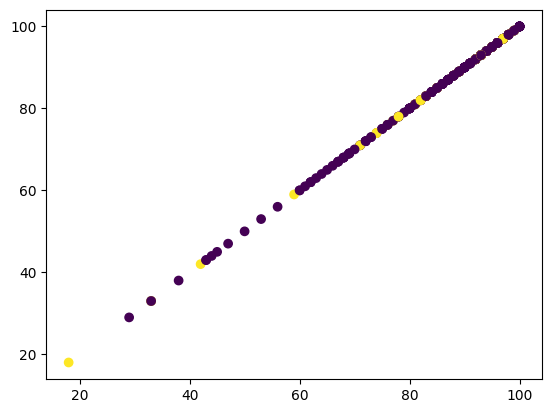

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data['tomatometer_rating'], data['tomatometer_rating'], c=data['winner'])

In [ ]:
"""
Make a binned barplot
fig, ax = plt.subplots(figsize=(9, 6))

for result in data.winner.unique():
    subset = data.loc[data['winner']==result]
    ax.bar(x)
"""

## Run model

In [13]:
X = np.array(data['tomatometer_rating'])
X = X.reshape(-1, 1)

y = data['winner'].astype(int)

In [14]:
model = LogisticRegression(random_state=0).fit(X, y)

In [15]:
model.coef_

array([[0.0033678]])

In [16]:
preds = model.predict(X)
accuracy_score(y, preds)

0.816711590296496

In [17]:
## Which movies does this make an incorrect prediction for? Why? 
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
data.head()

,tomatometer_rating,movie_title,year_film,winner
0,95.0,All the King's Men,1949,True
1,72.0,Julia,1977,False
2,93.0,The Apartment,1960,True
3,94.0,Winter's Bone,2010,False
4,92.0,The Kids Are All Right,2010,False


In [19]:
y[0:5]

0    1
1    0
2    1
3    0
4    0
Name: winner, dtype: int64

In [20]:
data.winner.value_counts()

False    303
True      68
Name: winner, dtype: int64

In [21]:
model = LogisticRegression(random_state=0, solver='liblinear').fit(X, y)

In [22]:
model.coef_

array([[-0.00575191]])

In [23]:
preds = model.predict(X)
accuracy_score(y, preds)

0.816711590296496

In [24]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(array([ 1.,  0.,  0.,  1.,  3.,  0.,  1.,  4.,  2.,  1.,  1.,  1.,  3.,
         5.,  6., 10.,  9., 13., 14., 23., 30., 57., 70., 58., 58.]),
 array([ 18.  ,  21.28,  24.56,  27.84,  31.12,  34.4 ,  37.68,  40.96,
         44.24,  47.52,  50.8 ,  54.08,  57.36,  60.64,  63.92,  67.2 ,
         70.48,  73.76,  77.04,  80.32,  83.6 ,  86.88,  90.16,  93.44,
         96.72, 100.  ]),
 <BarContainer object of 25 artists>)

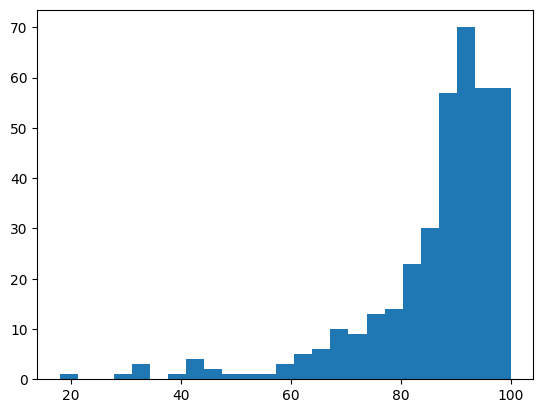

In [25]:
plt.hist(data['tomatometer_rating'], bins='auto')

## Try setting the class weight parameter to "balanced". This should give a higher penalty for predicting a loss incorrectly. 

In [26]:
model = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(X, y)

In [27]:
model.coef_

array([[0.00210688]])

In [28]:
preds = model.predict(X)
accuracy_score(y, preds)

0.3881401617250674

In [29]:
preds

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [43]:
# Okay, this is too strong! Back off model. 
# Let's try some custom dictionaries of weights. 
weights = {1: 5, 0: 1} # Give a win a weight of 5, versus a weight of 1 for a loss. 
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
model.coef_

array([[0.00265519]])

In [44]:
preds = model.predict(X)
accuracy_score(y, preds)

0.18598382749326145

In [45]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
weights = {1: 3, 0: 1} # A weight of 5 is too strong - try a weight of 3. 
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
any(preds > 0)

False

In [49]:
# A weight of 3 is too light. 
# Write an algorithm to find the best weight for a win in .10 increments between 3 and 5. 
weights_to_test = np.arange(3, 5, .10)
weights_to_test

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [52]:
# Our scoring algorithm will be: 
# 1. You must predict at least one win for all input data 
# 2. Take the model with the highest accuracy. 
results = {}
for weight in weights_to_test:
    weights = {1: weight, 0: 1} # 'Loss' class always stays at 1
    model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
    preds = model.predict(X)
    
    results[weight] = {
        'any_win': any(preds > 0),
        'accuracy': accuracy_score(y, preds)
    }

In [53]:
results

{3.0: {'any_win': False, 'accuracy': 0.816711590296496},
 3.1: {'any_win': False, 'accuracy': 0.816711590296496},
 3.2: {'any_win': False, 'accuracy': 0.816711590296496},
 3.3000000000000003: {'any_win': False, 'accuracy': 0.816711590296496},
 3.4000000000000004: {'any_win': False, 'accuracy': 0.816711590296496},
 3.5000000000000004: {'any_win': False, 'accuracy': 0.816711590296496},
 3.6000000000000005: {'any_win': False, 'accuracy': 0.816711590296496},
 3.7000000000000006: {'any_win': False, 'accuracy': 0.816711590296496},
 3.8000000000000007: {'any_win': False, 'accuracy': 0.816711590296496},
 3.900000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.000000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.100000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.200000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.300000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.400000000000001: {'any_win': True, 'acc

In [54]:
# Interesting. Make some plots here. 
# For weight = 4.4, what do the predictions look like? 
weights = {1: 4.4, 0: 1} # 'Loss' class always stays at 1
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)
preds

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [56]:
weights_to_test = np.arange(4.3, 4.4, .01)
weights_to_test

array([4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ])

In [57]:
# One more attempt - try hundredths between 4.3 and 4.4. 
# Our scoring algorithm will be: 
# 1. You must predict at least one win for all input data 
# 2. Take the model with the highest accuracy. 
results = {}
for weight in weights_to_test:
    weights = {1: weight, 0: 1} # 'Loss' class always stays at 1
    model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
    preds = model.predict(X)
    
    results[weight] = {
        'any_win': any(preds > 0),
        'accuracy': accuracy_score(y, preds)
    }

In [58]:
results

{4.3: {'any_win': False, 'accuracy': 0.816711590296496},
 4.31: {'any_win': False, 'accuracy': 0.816711590296496},
 4.319999999999999: {'any_win': True, 'accuracy': 0.7735849056603774},
 4.329999999999999: {'any_win': True, 'accuracy': 0.7681940700808625},
 4.339999999999999: {'any_win': True, 'accuracy': 0.7547169811320755},
 4.349999999999999: {'any_win': True, 'accuracy': 0.7250673854447439},
 4.3599999999999985: {'any_win': True, 'accuracy': 0.6846361185983828},
 4.369999999999998: {'any_win': True, 'accuracy': 0.6765498652291105},
 4.379999999999998: {'any_win': True, 'accuracy': 0.6388140161725068},
 4.389999999999998: {'any_win': True, 'accuracy': 0.5929919137466307},
 4.399999999999998: {'any_win': True, 'accuracy': 0.5633423180592992}}

In [59]:
# Thousandths!
weights_to_test = np.arange(4.3, 4.4, .001)
weights_to_test

array([4.3  , 4.301, 4.302, 4.303, 4.304, 4.305, 4.306, 4.307, 4.308,
       4.309, 4.31 , 4.311, 4.312, 4.313, 4.314, 4.315, 4.316, 4.317,
       4.318, 4.319, 4.32 , 4.321, 4.322, 4.323, 4.324, 4.325, 4.326,
       4.327, 4.328, 4.329, 4.33 , 4.331, 4.332, 4.333, 4.334, 4.335,
       4.336, 4.337, 4.338, 4.339, 4.34 , 4.341, 4.342, 4.343, 4.344,
       4.345, 4.346, 4.347, 4.348, 4.349, 4.35 , 4.351, 4.352, 4.353,
       4.354, 4.355, 4.356, 4.357, 4.358, 4.359, 4.36 , 4.361, 4.362,
       4.363, 4.364, 4.365, 4.366, 4.367, 4.368, 4.369, 4.37 , 4.371,
       4.372, 4.373, 4.374, 4.375, 4.376, 4.377, 4.378, 4.379, 4.38 ,
       4.381, 4.382, 4.383, 4.384, 4.385, 4.386, 4.387, 4.388, 4.389,
       4.39 , 4.391, 4.392, 4.393, 4.394, 4.395, 4.396, 4.397, 4.398,
       4.399, 4.4  ])

In [60]:
results = {}
for weight in weights_to_test:
    weights = {1: weight, 0: 1} # 'Loss' class always stays at 1
    model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
    preds = model.predict(X)
    
    results[weight] = {
        'any_win': any(preds > 0),
        'accuracy': accuracy_score(y, preds)
    }

In [61]:
results

{4.3: {'any_win': False, 'accuracy': 0.816711590296496},
 4.301: {'any_win': False, 'accuracy': 0.816711590296496},
 4.3020000000000005: {'any_win': False, 'accuracy': 0.816711590296496},
 4.303000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.304000000000001: {'any_win': False, 'accuracy': 0.816711590296496},
 4.3050000000000015: {'any_win': False, 'accuracy': 0.816711590296496},
 4.306000000000002: {'any_win': False, 'accuracy': 0.816711590296496},
 4.307000000000002: {'any_win': False, 'accuracy': 0.816711590296496},
 4.3080000000000025: {'any_win': False, 'accuracy': 0.816711590296496},
 4.309000000000003: {'any_win': False, 'accuracy': 0.816711590296496},
 4.310000000000003: {'any_win': False, 'accuracy': 0.816711590296496},
 4.3110000000000035: {'any_win': False, 'accuracy': 0.816711590296496},
 4.312000000000004: {'any_win': False, 'accuracy': 0.816711590296496},
 4.313000000000004: {'any_win': False, 'accuracy': 0.816711590296496},
 4.3140000000000045: {'any_w

In [63]:
weights = {1: 4.315, 0: 1} # 'Loss' class always stays at 1
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
model.coef_

array([[0.0022996]])